# Modeling

In [32]:
#pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [55]:
#!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 0.9/124.9 MB 8.2 MB/s eta 0:00:16
    --------------------------------------- 1.7/124.9 MB 10.8 MB/s eta 0:00:12
    --------------------------------------- 2.0/124.9 MB 10.8 MB/s eta 0:00:12
    --------------------------------------- 2.9/124.9 MB 11.5 MB/s eta 0:00:11
   - -------------------------------------- 3.2/124.9 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 3.9/124.9 MB 11.4 MB/s eta 0:00:11
   - -------------------------------------- 4.3/124.9 MB 11.0 MB/s eta 0:00:11
   - -------------------------------------- 4.6/124.9 MB 10.9 MB/s eta 0:00:12
   - -------------------------------------- 5.0/124.9 MB 10.2 MB/s eta 0:00:12
   - -------------------------------------- 5.2/124.9 MB 10.1 MB/s eta

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [6]:
pain = pd.read_csv(r'C:\Users\rockm\Desktop\GA\Projects\project-5\data\pain_clean.csv')

In [7]:
pain.shape

(170317, 27)

In [8]:
X = pain.drop('PRLMISEVR', axis=1)
y = pain['PRLMISEVR']

In [9]:
ros = RandomOverSampler(random_state=42)

In [10]:
X_resampled, y_resampled = ros.fit_resample(X, y)

In [7]:
print(f'Resampled dataset shape: {Counter(y_resampled)}')

Resampled dataset shape: Counter({1: 152080, 0: 152080})


In [125]:
# There's a large class imbalance of about 90/10 for my target variable, so I'm going to oversample the minority group

In [11]:
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['PRLMISEVR'] = y_resampled

In [12]:
resampled_data.head()

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISAB,...,HALUCNG,TRTMENT,MHTRTMT,AGE_MARRIED,AGE_EMPLOY,REPORTED_HEALTH,HISTORY,UPPERS,DOWNERS,PRLMISEVR
0,15,3,1,0,2,2,0,3,4,10,...,2,6,0,0,6,12,1,10,0,1
1,15,3,0,0,3,1,0,6,7,10,...,5,5,0,0,3,42,1,12,0,1
2,15,2,0,0,3,3,0,4,2,10,...,3,7,2,0,6,8,1,8,0,1
3,15,1,0,0,1,3,0,5,0,10,...,2,0,0,0,3,0,1,6,0,1
4,15,5,0,0,3,3,0,5,2,9,...,2,7,0,0,15,10,1,4,75,1


In [13]:
resampled_data['PRLMISEVR'].value_counts()

PRLMISEVR
1    152080
0    152080
Name: count, dtype: int64

In [11]:
resampled_data.describe()

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISAB,...,HALUCNG,TRTMENT,MHTRTMT,AGE_MARRIED,AGE_EMPLOY,REPORTED_HEALTH,HISTORY,UPPERS,DOWNERS,PRLMISEVR
count,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,...,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000,304160.000000
mean,15.988447,2.820841,0.510524,1.296147,3.220322,2.309265,1.478880,2.444720,1.438309,2.484370,...,0.745223,0.177486,0.312678,4.494776,6.289032,4.037092,0.061431,0.457762,0.074615,0.500000
std,0.817568,1.319810,0.499890,1.495745,1.391535,0.686217,1.229998,1.070287,2.311602,3.370301,...,1.251537,0.945916,0.805703,6.190536,3.505636,7.541110,0.240120,1.637018,1.447678,0.500001
min,15.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,3.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,17.000000,4.000000,1.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,2.000000,0.000000,0.000000,8.000000,8.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,17.000000,5.000000,1.000000,4.000000,5.000000,3.000000,3.000000,7.000000,10.000000,10.000000,...,5.000000,10.000000,8.000000,20.000000,15.000000,70.000000,1.000000,25.000000,75.000000,1.000000


In [12]:
resampled_data.shape

(304160, 27)

### Model 1 - Random Forest 

In [13]:
X = resampled_data.drop(columns=['MARRIED', 'EDUCAT', 'CTYMETRO', 'PRLMISAB', 'PRLANY', 'PRLMISEVR'])
y = resampled_data['PRLMISEVR']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = rf.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8441609679116254
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     38099
           1       0.88      0.80      0.84     37941

    accuracy                           0.84     76040
   macro avg       0.85      0.84      0.84     76040
weighted avg       0.85      0.84      0.84     76040

Confusion Matrix:
[[33756  4343]
 [ 7507 30434]]


In [19]:
rf.score(X_test, y_test)

0.8441609679116254

### Model 2 - Random Forest w/ GridSearchCV

In [20]:
X = resampled_data.drop(columns=['MARRIED', 'EDUCAT', 'CTYMETRO', 'PRLMISAB', 'PRLANY', 'PRLMISEVR'])
y = resampled_data['PRLMISEVR']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [23]:
rf2 = RandomForestClassifier(random_state=42)

In [63]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [64]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [65]:
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

Best parameters found: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8438935647904611


In [66]:
rf2 = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

In [67]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)

In [68]:
rf2.score(X_test, y_test)

0.8508285113098369

### Model 3 - Basic Logistic Regression

In [71]:
logr = LogisticRegression(random_state=42)

In [72]:
logr.fit(X_train, y_train)

C:\Users\rockm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [73]:
logr.score(X_test, y_test)

0.7496054708048395

### Model 4 - SVM (Didn't run properly)

In [31]:
from sklearn.svm import SVC

In [32]:
svm = SVC(kernel='linear', random_state=42)

In [ ]:
# For some reason I couldn't get this to ever finish running no matter what I tried.
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

### Model 5 - Sequential Neural Net

In [ ]:
X = resampled_data.drop(columns=['MARRIED', 'EDUCAT', 'CTYMETRO', 'PRLMISAB', 'PRLANY', 'PRLMISEVR'])
y = resampled_data['PRLMISEVR']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
seq = Sequential()
seq.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
seq.add(Dropout(0.5))
seq.add(Dense(64, activation='relu'))
seq.add(Dropout(0.5))
seq.add(Dense(32, activation='relu'))
seq.add(Dense(1, activation='sigmoid'))

C:\Users\rockm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
seq.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [30]:
seq.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
          callbacks=[early_stopping], verbose=1)

Epoch 1/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7345 - loss: 0.5363 - val_accuracy: 0.7588 - val_loss: 0.5103
Epoch 2/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7528 - loss: 0.5117 - val_accuracy: 0.7589 - val_loss: 0.5029
Epoch 3/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7544 - loss: 0.5093 - val_accuracy: 0.7597 - val_loss: 0.5047
Epoch 4/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7552 - loss: 0.5082 - val_accuracy: 0.7609 - val_loss: 0.5062
Epoch 5/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7579 - loss: 0.5060 - val_accuracy: 0.7595 - val_loss: 0.5093
Epoch 6/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7555 - loss: 0.5058 - val_accuracy: 0.7614 - val_loss: 0.5073
Epoch 7/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7573 - loss: 0.5063 - val_accuracy: 0.7585 - val_loss: 0.5110
Epoch 8/100
7129/7129 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7562 - loss

### Model 6 - Random Forest w/ PCA

In [14]:
X = resampled_data.drop(columns=['PRLMISAB', 'PRLANY', 'PRLMISEVR'])
y = resampled_data['PRLMISEVR']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
pca = PCA(n_components=15) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.20638854 0.14549563 0.09682644 0.07512996 0.06736511 0.05559597
 0.0491044  0.03961241 0.03525053 0.03281235 0.03062483 0.02821143
 0.02600917 0.02459811 0.02244449]


In [19]:
rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

In [20]:
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)

In [21]:
y_pred = rf_model.predict(X_test_pca)

In [22]:
print("Random Forest Accuracy with PCA:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Random Forest Accuracy with PCA: 0.8883219358232509
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     38099
           1       0.92      0.86      0.88     37941

    accuracy                           0.89     76040
   macro avg       0.89      0.89      0.89     76040
weighted avg       0.89      0.89      0.89     76040

Confusion Matrix:
[[35093  3006]
 [ 5486 32455]]


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[35093,  3006],
       [ 5486, 32455]], dtype=int64)

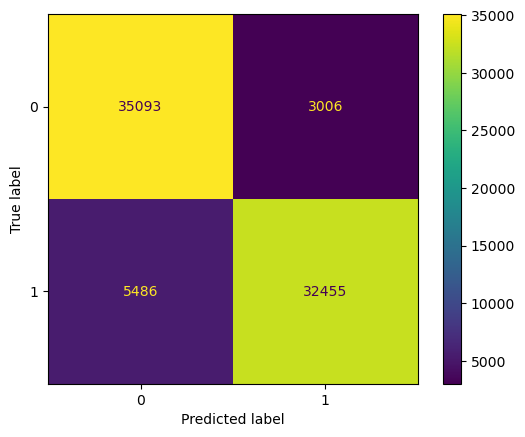

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [25]:
rf_model.score(X_test_pca, y_test)

0.8883219358232509

### Model 7 - Voting Classifier w/ Random Forest, Gradient Boosting and Extreme Gradient Boosting

In [105]:
X = resampled_data.drop(columns=['PRLMISAB', 'PRLANY', 'PRLMISEVR'])
y = resampled_data['PRLMISEVR']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [109]:
from sklearn.ensemble import VotingClassifier

In [110]:
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, random_state=42)

In [111]:
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)], voting='soft')

In [112]:
voting_model.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=30,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            earl...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [113]:
y_pred = voting_model.predict(X_test_pca)

In [114]:
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy: 0.8475539189900052
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     38099
           1       0.87      0.82      0.84     37941

    accuracy                           0.85     76040
   macro avg       0.85      0.85      0.85     76040
weighted avg       0.85      0.85      0.85     76040

Confusion Matrix:
[[33494  4605]
 [ 6987 30954]]


In [115]:
voting_model.score(X_test_pca, y_test)

0.8475539189900052

### Model 8 - PCA, Voting, including history of minimum prescription medication abuse

In [95]:
X = resampled_data[['MENTHLTH', 'UPPERS', 'DOWNERS', 'HISTORY', 'REPORTED_HEALTH', 'TRTMENT', 'HALUCNG', 'AMPHETMN', 'COCAINE', 'TRQLZRS', 'HEROINUSE', 'HEROINEVR', 'PRLANY']]
y = resampled_data['PRLMISEVR']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
pca = PCA(n_components=10) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [99]:
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, random_state=42)

In [100]:
voting_model2 = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model), ('xgb', xgb_model)], voting='soft')

In [101]:
voting_model2.fit(X_train_pca, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=30,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            earl...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [102]:
y_pred = voting_model.predict(X_test_pca)

In [103]:
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy: 0.9167674907943187
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     38099
           1       0.86      1.00      0.92     37941

    accuracy                           0.92     76040
   macro avg       0.93      0.92      0.92     76040
weighted avg       0.93      0.92      0.92     76040

Confusion Matrix:
[[31826  6273]
 [   56 37885]]


In [104]:
voting_model2.score(X_test_pca, y_test)

0.9167674907943187

### Model 9 - Changing Target Variable

In [116]:
X = resampled_data.drop(columns=['PRLMISAB', 'PRLANY', 'PRLMISEVR'])
y = resampled_data['PRLMISAB']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [118]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
pca = PCA(n_components=15) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [120]:
rf3 = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

In [121]:
rf3.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200,
                       random_state=42)

In [122]:
y_pred = rf3.predict(X_test_pca)

In [123]:
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Voting Classifier Accuracy: 0.8863098369279326
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     38099
           1       0.93      0.36      0.52       111
           2       0.92      0.84      0.88     19736
           3       0.84      0.45      0.58        69
           4       0.96      0.76      0.85        58
           5       1.00      0.17      0.29         6
           7       0.90      0.72      0.80      7076
           8       0.94      0.84      0.89      3545
           9       0.94      0.83      0.88      3428
          10       0.96      0.91      0.94      3912

    accuracy                           0.89     76040
   macro avg       0.92      0.68      0.75     76040
weighted avg       0.89      0.89      0.88     76040

Confusion Matrix:
[[36066     3  1265     5     2     0   408   116   128   106]
 [   69    40     2     0     0     0     0     0     0     0]
 [ 2870     0 16675     1  

In [124]:
rf3.score(X_test_pca, y_test)

0.8863098369279326